In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  return (5*x**2 - 3*x + 5)

In [ ]:
f(5)

115

In [ ]:
xs = np.arange(-5, 5, 0.2)
xs

array([-5.0000000e+00, -4.8000000e+00, -4.6000000e+00, -4.4000000e+00,
       -4.2000000e+00, -4.0000000e+00, -3.8000000e+00, -3.6000000e+00,
       -3.4000000e+00, -3.2000000e+00, -3.0000000e+00, -2.8000000e+00,
       -2.6000000e+00, -2.4000000e+00, -2.2000000e+00, -2.0000000e+00,
       -1.8000000e+00, -1.6000000e+00, -1.4000000e+00, -1.2000000e+00,
       -1.0000000e+00, -8.0000000e-01, -6.0000000e-01, -4.0000000e-01,
       -2.0000000e-01,  4.4408921e-15,  2.0000000e-01,  4.0000000e-01,
        6.0000000e-01,  8.0000000e-01,  1.0000000e+00,  1.2000000e+00,
        1.4000000e+00,  1.6000000e+00,  1.8000000e+00,  2.0000000e+00,
        2.2000000e+00,  2.4000000e+00,  2.6000000e+00,  2.8000000e+00,
        3.0000000e+00,  3.2000000e+00,  3.4000000e+00,  3.6000000e+00,
        3.8000000e+00,  4.0000000e+00,  4.2000000e+00,  4.4000000e+00,
        4.6000000e+00,  4.8000000e+00])

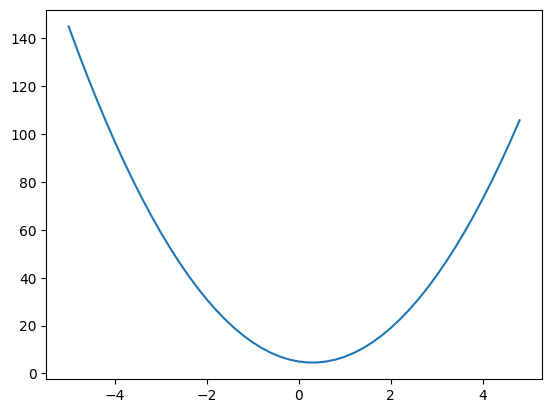

In [ ]:
ys = f(xs)
plt.plot(xs, ys)

So what really is derivative??
It provides the response that we get when we try to increase the input value of the function by very small amount i.e the small amount tends to be zero.

In [ ]:
h = 0.001
x = 3.0
print(f(x),f(x + h))
print((f(x + h) - f(x))/ h)

41.0 41.027004999999996
27.004999999995505


i.e. at x = 3, the slop is 27. If we increase the value of x at point x = 3 by just 0.001, it will increse 27.004 time h.

In [ ]:
h = 0.0000001
x = -3.0
print(f(x),f(x + h))
print((f(x + h) - f(x))/ h)

59.0 58.999996700000054
-32.99999946193566


here the negative sign says, on slight increase of the value of input to f(x) the output gets reduced i.e slope is negative

In [ ]:
h = 0.0000000001
x = 0.3
print(f(x),f(x + h))
print((f(x + h) - f(x))/ h)

4.55 4.55
0.0


In [ ]:
a = 3.0
b = -5.0
c = 4.0

d = a * b + c
print(d)

-11.0


In [ ]:
h = 0.0001

a = 3.0
b = -5.0
c = 4.0

d1 = a * b + c
c += h
d2 = a * b + c

print('d1: ', d2, '   d2:', d2)
print('slope:: ', (d2 - d1)/h)

d1:  -10.9999    d2: -10.9999
slope::  0.9999999999976694


So what we saw here is on increment of different variable here, namely a, b, and c. The slope are different. When we bump a by h; what it does is it increment the negative value of the b i.e it is actually increasing the output in negative direction and hence it's slope is negative.

Similarly on bumping b we get slope of positive cause on adding on the value of b which is negative produce slighly less negative number and thus slope is positive.

In [ ]:
# class Value:
#   def __init__(self, data):
#     self.data = data

#   def __repr__(self):
#     return f"Value (data = {self.data})"

#   def __add__(self, other): #if a and b are Value object then on a + b, python will do a.__add__(b)
#     return Value(self.data + other.data)

#   def __mul__(self, other):
#     return Value(self.data * other.data)

#   def __div__(self, other):
#     return Value(self.data/other.data)

In [ ]:
# a = Value(2.0)
# b = Value(3.0)
# c = a + b
# print(a*b + c)

In [ ]:
class Value:
  def __init__(self, data, _prev = (), _op = '', label = ''):
    self.data = data
    self._prev = _prev
    self._op = _op
    self.label = label
    self.grad = 0 #by default we assume the grad is 0 i.e. no effect.


  def __repr__(self):
    return f"Value (data = {self.data})"

  def __add__(self, other): #if a and b are Value object then on a + b, python will do a.__add__(b)
    return Value(self.data + other.data, (self, other), '+')

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

  def __div__(self, other):
    return Value(self.data/other.data, (self, other), '/')

In [ ]:
a = Value(2.0, label = 'a')
b = Value(3.0, label = 'b')
c = a + b; c.label = 'c'
e = a* b; e.label = 'e'
d = e - c; d.label = 'd'
f = Value(-1, label = 'f')
# g = e - d; g.label = 'g'
L = d * f; L.label = 'Output'
print(d._prev, d._op, c._prev, a._prev)

(Value (data = 6.0), Value (data = 5.0)) - (Value (data = 2.0), Value (data = 3.0)) ()


In [ ]:
from graphviz import Digraph

In [ ]:
def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format = 'svg', graph_attr = {'rankdir':'LR'})

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))

    dot.node(name = uid, label =f"{n.label} | data {n.data:.4f} | grad {n.grad:.4f}" , shape = 'record')

    if n._op: #if value is result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

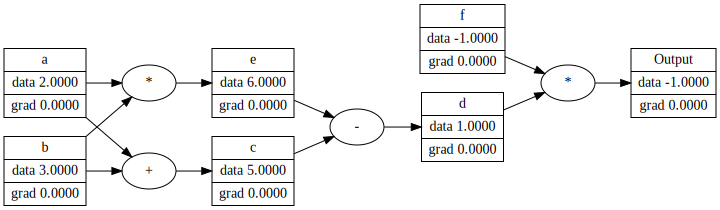

In [ ]:
draw_dot(L)

In [ ]:
print(trace(c))

({Value (data = 3.0), Value (data = 2.0), Value (data = 5.0)}, {(Value (data = 3.0), Value (data = 5.0)), (Value (data = 2.0), Value (data = 5.0))})


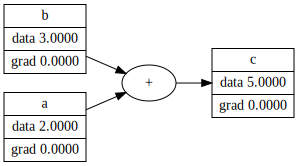

In [ ]:
draw_dot(c)

Now we backpropagate from output to the intial nodes. As of above figure while backpropagating; first we calculate the derivative of c with respect to c; then derviative of a w.r.t. c and then derivative of a w.r.t. c.


This shows how the input: a and b is impacting the output c.

In [ ]:
def check_grad():

  h = 0.0001

  a = Value(2.0, label = 'a')
  b = Value(3.0, label = 'b')
  c = a + b; c.label = 'c'
  e = a* b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-1, label = 'f')
  L = d * f; L.label = 'Output'
  L1 = L.data

  a = Value(2.0, label = 'a')
  b = Value(3.0, label = 'b')
  c = a + b; c.label = 'c'
  e = a* b; e.label = 'e'
  e.data += h
  d = e + c; d.label = 'd'
  f = Value(-1, label = 'f')
  L = d * f; L.label = 'Output'
  L2 = L.data

  print((L2 - L1)/h)

check_grad()

-0.9999999999976694


In [ ]:
# L = d * f
# dL/dd = ? is what we want i.e. f
f.grad = d.data
d.grad = f.data
# dL/de = dl/dd * dd/de == f * d(e+c)/de == f * 1
e.grad = f.data * 1
c.grad = f.data * 1

# dl/db = dl/dd * dd/db = f *(d(e+c)/db) = f*(d(a*b)/db + d(a+b)/db) = f*(a + 1)
b.grad = f.data * (a.data + 1)
# dl/da = dl/dd * dd/da = f* (d(e + c)/da) = f * (d(ab)/da + d(a + b)/da) = f * (b + 1)
a.grad = f.data * (b.data + 1)


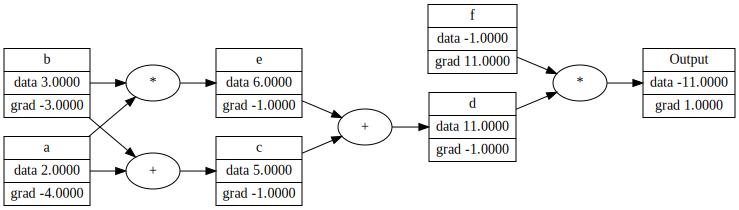

In [ ]:
L.grad = 1.0

draw_dot(L)

In [ ]:
print(b.data, b.grad)

3.0 -3.0


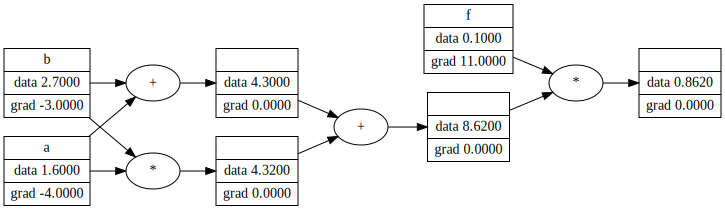

In [ ]:
a.data += 0.1 * a.grad
b.data += 0.1 * b.grad
f.data += 0.1 * f.grad
# c.data += c.grad

e = a * b
c = a + b
d = e + c
L = f * d

draw_dot(L)

# Here the data of output node is moving forward to 0

---
# A NEURON

In [ ]:
class Value:
  def __init__(self, data, _prev = (), _op = '', label = ''):
    self.data = data
    self._prev = _prev
    self._op = _op
    self.label = label
    self.grad = 0 #by default we assume the grad is 0 i.e. no effect.


  def __repr__(self):
    return f"Value (data = {self.data})"

  def __add__(self, other): #if a and b are Value object then on a + b, python will do a.__add__(b)
    return Value(self.data + other.data, (self, other), '+')

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

  def __div__(self, other):
    return Value(self.data/other.data, (self, other), '/')

  # def tanh(self):
  #   n = self.data
  #   t = (math.exp(2*n) - 1)/(math.exp(2*x) + 1)
  #   out = Value(t, (self, ), 'tanh')
  #   return out
  def tanh(self):
    return Value((math.exp(2*self.data) - 1)/(math.exp(2*self.data) + 1), (self, ), 'tanh')

4.0


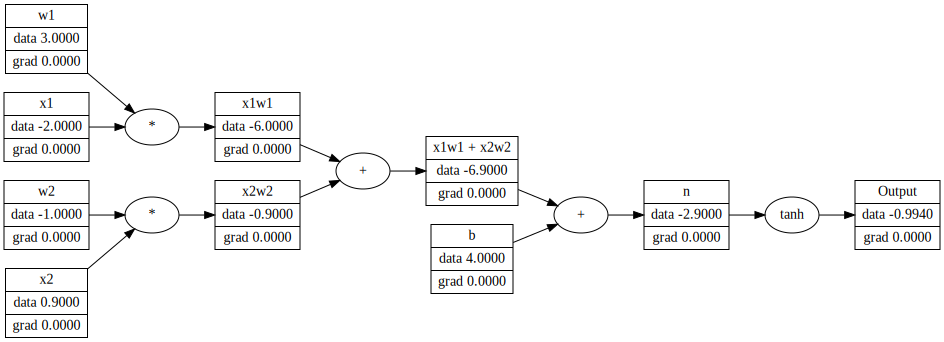

In [ ]:
x1 = Value(-2.0, label = 'x1')
x2 = Value(0.9, label = 'x2')

w1 = Value(3.0, label = 'w1')
w2 = Value(-1.0, label = 'w2')

b = Value(4.0, label = 'b')
print(b.data)

x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'Output'
draw_dot(o)

In [ ]:
#backpropagation
o.grad = 1.0

# do/dn = 1 - tanh(n) ** 2 = 1 - o** 2
n.grad = 1 - o.data ** 2

#do/db = do/dn * dn/db = (1 - o**2) * 1 = 1 - o**2
b.grad = 1- o.data ** 2

#d(o)/d(x1w1x2w2) = do/dn * dn/d(x1w1x2w2) = (1 - o** 2) * 1
x1w1x2w2.grad = 1 - o.data** 2

# do/d(x1w1) = do/dn * dn/d(x1w1x2w2) * d(x1w1x2w2)/d(x1w1) == (1 - o**2) (1) (1)
x2w2.grad = 1- o.data**2
x1w1.grad = 1 - o.data** 2

# do/dx1 = do/dn * dn/(d(x1w1x2w2))* d(x1w1x2w2)/dx1w1 * d(x1w1)/dx1 = (1 - o**2) * (1) * (w1)
x1.grad = (1 - o.data ** 2) * w1.data
w1.grad = (1 - o.data ** 2) * x1.data

x2.grad = (1 - o.data ** 2)  * w2.data
w2.grad = (1- o.data**2) * x2.data

In [ ]:
def check_grad():

  h = 0.001

  x1 = Value(-2.0, label = 'x1')
  x2 = Value(0.9, label = 'x2')

  w1 = Value(3.0, label = 'w1')
  w2 = Value(-1.0, label = 'w2')

  b = Value(4.0, label = 'b')

  x1w1 = x1 * w1; x1w1.label = 'x1w1'
  x2w2 = x2 * w2; x2w2.label = 'x2w2'

  x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
  n = x1w1x2w2 + b; n.label = 'n'
  o = n.tanh(); o.label = 'Output'
  o1 = o.data

  x1 = Value(-2.0, label = 'x1')
  x2 = Value(0.9, label = 'x2')
  w1 = Value(3.0, label = 'w1')
  w2 = Value(-1.0, label = 'w2')
  x1.data += h

  b = Value(4.0, label = 'b')

  x1w1 = x1 * w1; x1w1.label = 'x1w1'
  x2w2 = x2 * w2; x2w2.label = 'x2w2'

  x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
  n = x1w1x2w2 + b; n.label = 'n'
  o = n.tanh(); o.label = 'Output'
  o2 = o.data

  print((o2 - o1)/h)

check_grad()

0.036219559918171385


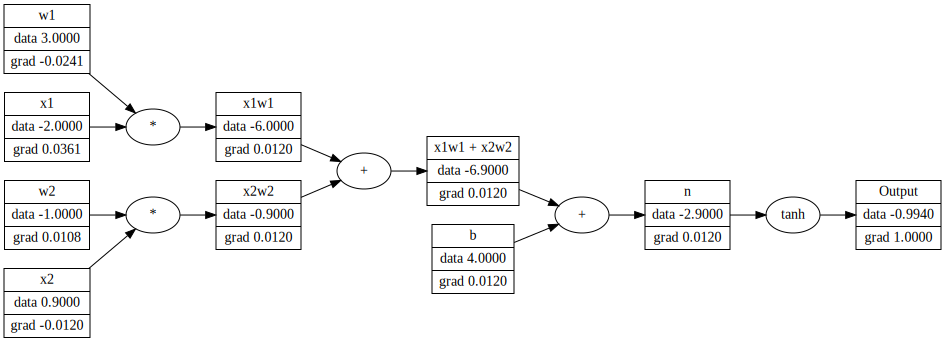

In [ ]:
draw_dot(o)

In [ ]:
class Value:
  def __init__(self, data, _prev = (), _op = '', label = ''):
    self.data = data
    self._prev = _prev
    self._op = _op
    self.label = label
    self.grad = 0 #by default we assume the grad is 0 i.e. no effect.
    self._backward = lambda: None


  def __repr__(self):
    return f"Value (data = {self.data})"

  def __add__(self, other): #if a and b are Value object then on a + b, python will do a.__add__(b)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      #d(a + b)/da = 1
      self.grad = 1 * out.grad
      other.grad = 1 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    #d(ab)/da = b
    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad

    out._backward = _backward
    return out

  def __div__(self, other):
    return Value(self.data/other.data, (self, other), '/')

  # def tanh(self):
  #   n = self.data
  #   t = (math.exp(2*n) - 1)/(math.exp(2*x) + 1)
  #   out = Value(t, (self, ), 'tanh')
  #   return out
  def tanh(self):
    t = (math.exp(2*self.data) - 1)/(math.exp(2*self.data) + 1)
    out = Value(t, (self, ), 'tanh')
    # d(tanh(a))/da = 1 - a ** 2
    def _backward():
      self.grad = (1 - t ** 2) * out.grad
    out._backward = _backward

    return out

4.0


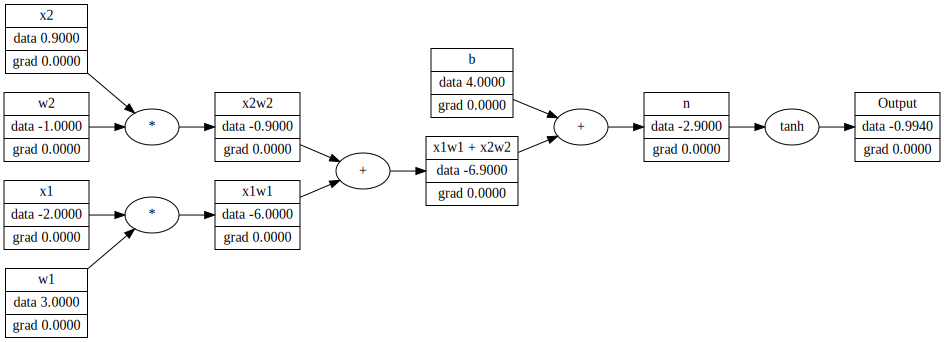

In [ ]:
x1 = Value(-2.0, label = 'x1')
x2 = Value(0.9, label = 'x2')

w1 = Value(3.0, label = 'w1')
w2 = Value(-1.0, label = 'w2')

b = Value(4.0, label = 'b')
print(b.data)

x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'Output'
draw_dot(o)

In [ ]:
o.grad = 1.0
o._backward()
n._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

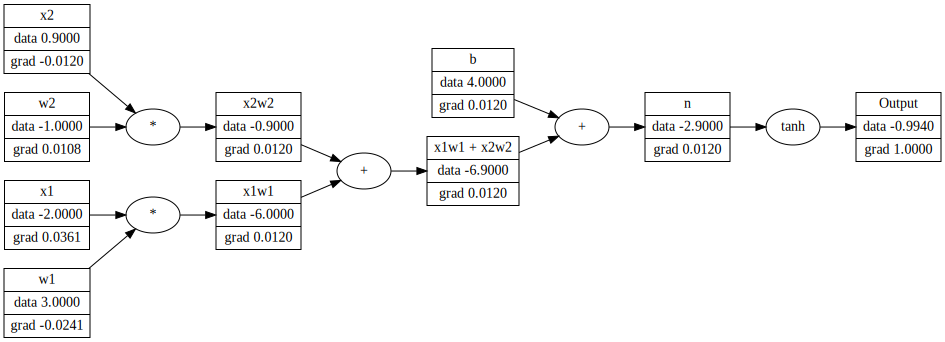

In [ ]:
draw_dot(o)

In [ ]:
#topological sorting of nodes(Values) such that we can loop on that sort to backpropagate from last node to first node
top = []
visited = set()
def build_top(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_top(child)
    top.append(v)
build_top(o)
top

for i in top:
  i._backward()

In [ ]:
class Value:
  def __init__(self, data, _prev = (), _op = '', label = ''):
    self.data = data
    self._prev = _prev
    self._op = _op
    self.label = label
    self.grad = 0.0 #by default we assume the grad is 0 i.e. no effect.
    self._backward = lambda: None


  def __repr__(self):
    return f"Value (data = {self.data})"

  def __add__(self, other): #if a and b are Value object then on a + b, python will do a.__add__(b)
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      #d(a + b)/da = 1
      self.grad += 1 * out.grad
      other.grad += 1 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    #d(ab)/da = b
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def __div__(self, other):
    return Value(self.data/other.data, (self, other), '/')
  # def tanh(self):
  #   n = self.data
  #   t = (math.exp(2*n) - 1)/(math.exp(2*x) + 1)
  #   out = Value(t, (self, ), 'tanh')
  #   return out

  def tanh(self):
    t = (math.exp(2*self.data) - 1)/(math.exp(2*self.data) + 1)
    out = Value(t, (self, ), 'tanh')
    # d(tanh(a))/da = 1 - a ** 2
    def _backward():
      self.grad = (1 - t ** 2) * out.grad
    out._backward = _backward
    return out


  def backward(self):
    top = []
    visited = set()
    def build_top(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_top(child)
        top.append(v)
    build_top(self)

    self.grad = 1
    for node in reversed(top):
      node._backward()


4.0


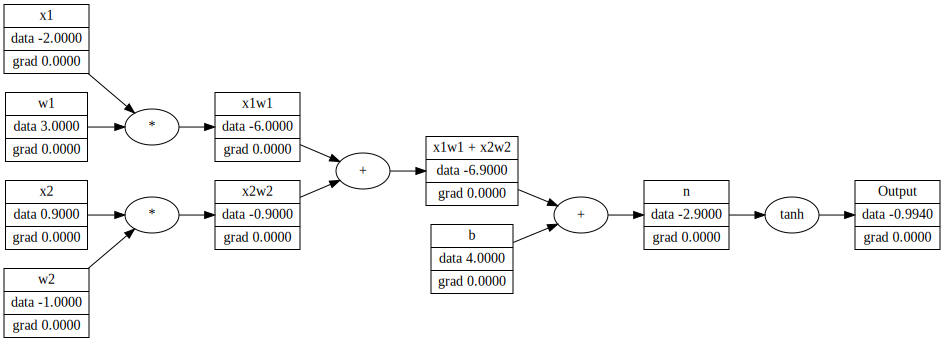

In [ ]:
x1 = Value(-2.0, label = 'x1')
x2 = Value(0.9, label = 'x2')

w1 = Value(3.0, label = 'w1')
w2 = Value(-1.0, label = 'w2')

b = Value(4.0, label = 'b')
print(b.data)

x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'Output'
draw_dot(o)


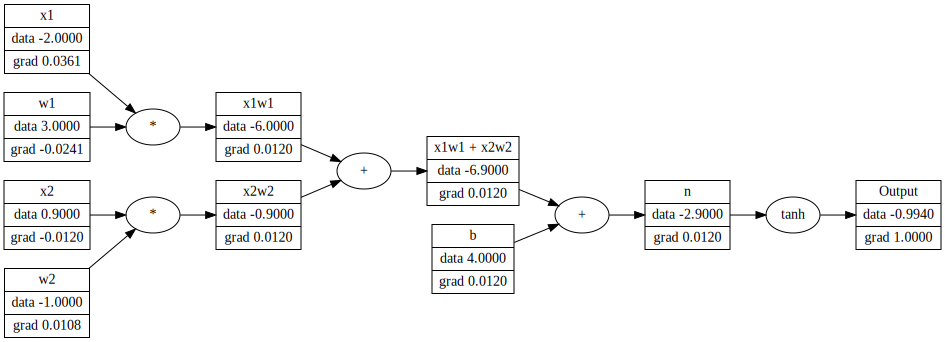

In [ ]:
o.backward()
draw_dot(o)

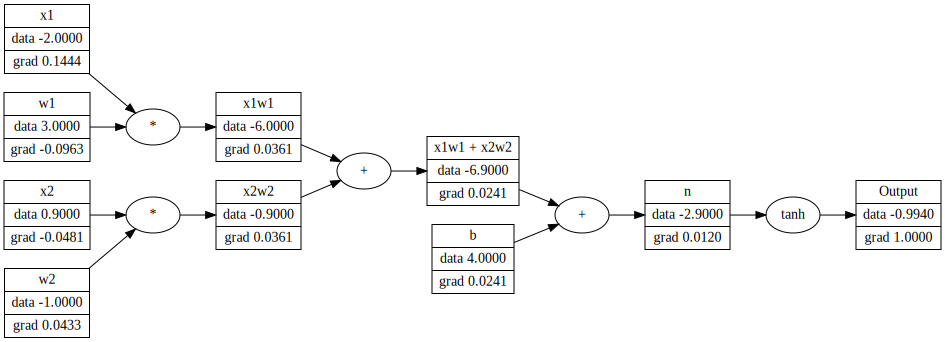

In [ ]:
o.backward()
draw_dot(o)

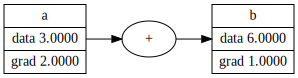

In [ ]:
a = Value(3.0, label = 'a')
b = a + a; b.label = 'b'

b.backward()
draw_dot(b)

In [ ]:
class Value:
  def __init__(self, data, _prev = (), _op = '', label = ''):
    self.data = data
    self._prev = _prev
    self._op = _op
    self.label = label
    self.grad = 0.0 #by default we assume the grad is 0 i.e. no effect.
    self._backward = lambda: None


  def __repr__(self):
    return f"Value (data = {self.data})"

  def __add__(self, other): #if a and b are Value object then on a + b, python will do a.__add__(b)
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      #d(a + b)/da = 1
      self.grad += 1 * out.grad
      other.grad += 1 * out.grad
    out._backward = _backward
    return out

  def __radd__(self, other):
    return self + other

  def __sub__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data - other.data, (self, other), '-')
    def _backward():
      #d(a - b)/da = 1
      #d(a -b)/db = -1
      self.grad += 1 * out.grad
      other.grad -= 1 * out.grad
    out._backward = _backward
    return out

  def __rsub__(self, other):
    return self - other

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    #d(ab)/da = b
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out


  def __rmul__(self, other):
    return self * other

  # def __truediv__(self, other):
  #   other = other if isinstance(other, Value) else Value(other)
  #   return Value(self.data/other.data, (self, other), '/')

  # def __truediv__(self, other):
  #   other = other if isinstance(other, Value) else Value(other)
  #   out = Value(self.data*(other.data ** -1), (self, other), '/')
  #   def _backward():
  #     #idk so let's just follow the tutorial
  #   out._backward = _backward
  #   return out

  def __truediv__(self, other):
    return self * (other ** -1)


  def __rtruediv__(self, other):
    return other * (self ** -1)


  def tanh(self):
    t = (math.exp(2*self.data) - 1)/(math.exp(2*self.data) + 1)
    out = Value(t, (self, ), 'tanh')
    # d(tanh(a))/da = 1 - a ** 2
    def _backward():
      self.grad = (1 - t ** 2) * out.grad
    out._backward = _backward
    return out

  def exp(self):
    x = self. data
    out = Value(math.exp(x), (self, ), 'exp')
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float, Value)), "please have int or float or Value for this to be valid [for now]"
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data ** other.data, (self, ), f'** {other.data}')
    def _backward():
      self.grad += other.data * (self.data ** (other.data - 1)) * out.grad
    out._backward = _backward
    return out

  def backward(self):
    top = []
    visited = set()
    def build_top(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_top(child)
        top.append(v)
    build_top(self)

    self.grad = 1
    for node in reversed(top):
      node._backward()


In [ ]:
a = Value(2.0, label = 'a')
b = Value(3, label = 'b')
c = a ** 2
c._backward()
print(c, c.grad)

a - b

Value (data = 4.0) 0.0


Value (data = -1.0)

4.0


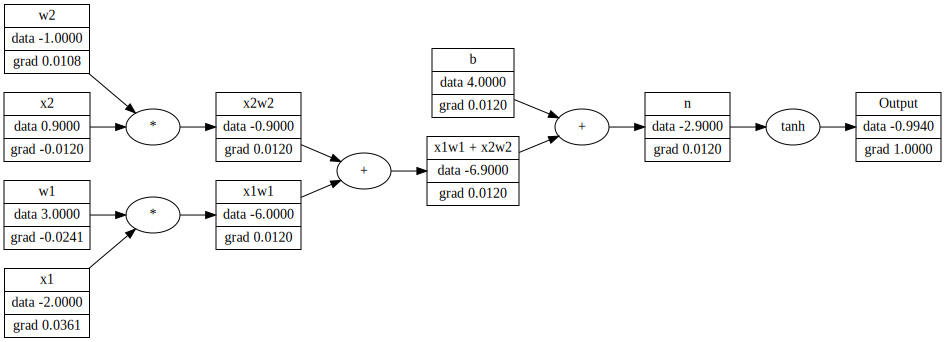

In [ ]:
x1 = Value(-2.0, label = 'x1')
x2 = Value(0.9, label = 'x2')

w1 = Value(3.0, label = 'w1')
w2 = Value(-1.0, label = 'w2')

b = Value(4.0, label = 'b')
print(b.data)

x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

# x1w1x2w2m = x1w1 - x2w2; x1w1x2w2.label = 'x1w1 - x2w2m'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'Output'
o.backward()
draw_dot(o)


-5.0


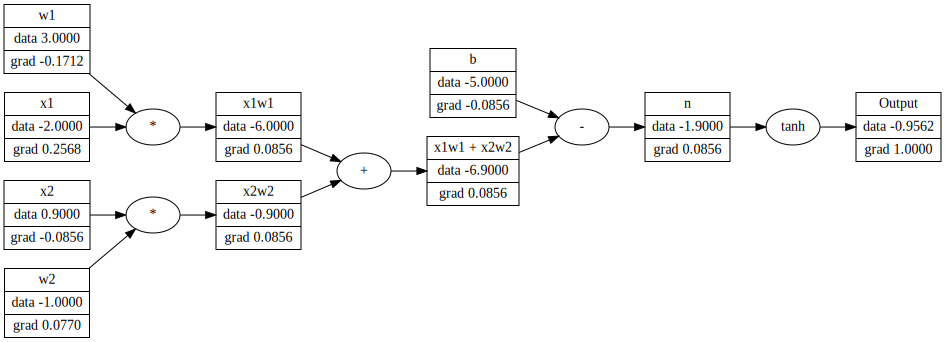

In [ ]:
x1 = Value(-2.0, label = 'x1')
x2 = Value(0.9, label = 'x2')

w1 = Value(3.0, label = 'w1')
w2 = Value(-1.0, label = 'w2')

b = Value(-5.0, label = 'b')
print(b.data)

x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

# x1w1x2w2m = x1w1 - x2w2; x1w1x2w2.label = 'x1w1 - x2w2m'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 - b; n.label = 'n'
o = n.tanh(); o.label = 'Output'
o.backward()
draw_dot(o)


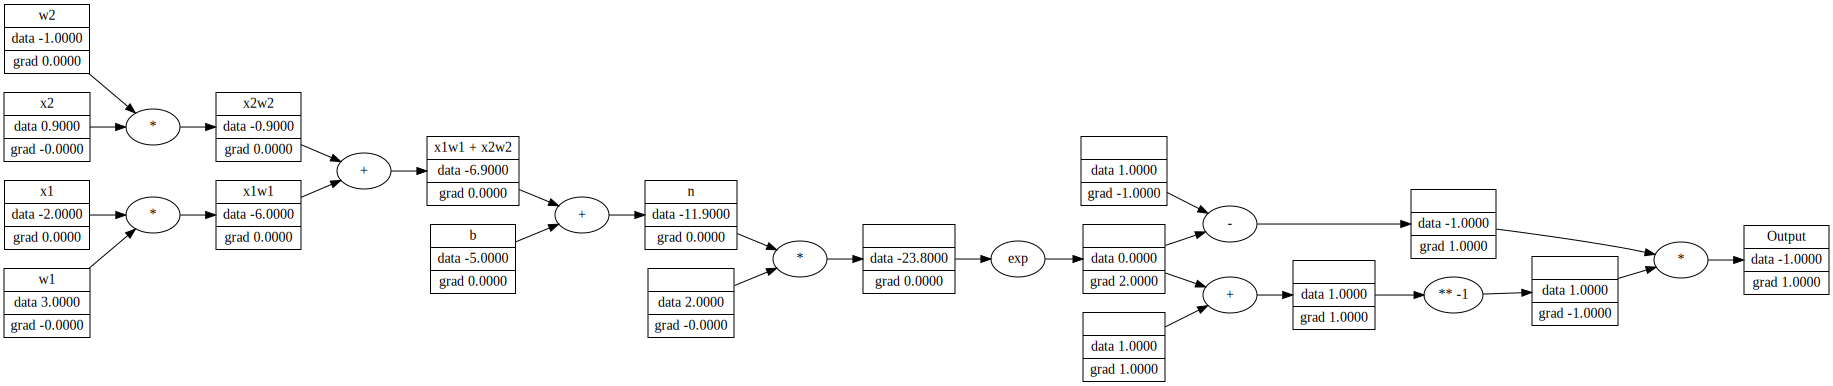

In [ ]:
x1 = Value(-2.0, label = 'x1')
x2 = Value(0.9, label = 'x2')

w1 = Value(3.0, label = 'w1')
w2 = Value(-1.0, label = 'w2')

b = Value(-5.0, label = 'b')
# print(b.data)

x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

# x1w1x2w2m = x1w1 - x2w2; x1w1x2w2.label = 'x1w1 - x2w2m'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b; n.label = 'n'

#-------------
e = (2 * n).exp()
o = (e -1 )/(e + 1); o.label = 'Output'
# o = n.tanh(); o.label = 'Output'
#--------

o.backward()
draw_dot(o)


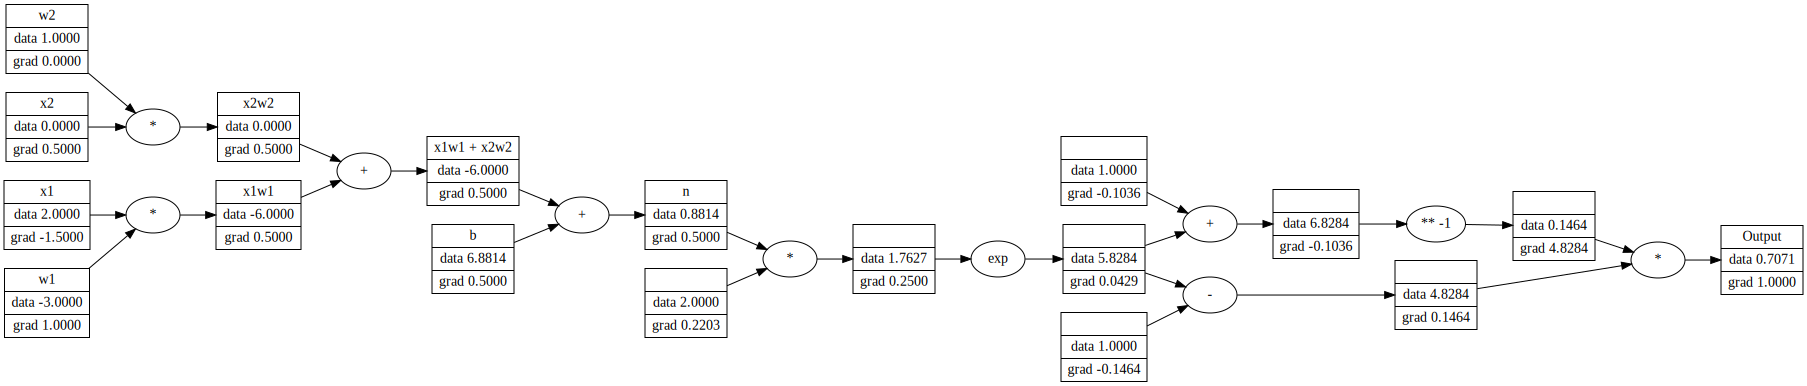

In [ ]:
#data to check with if the karpathy and Me are on same page

x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(6.8813735870195432, label = 'b')

x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'

# x1w1x2w2m = x1w1 - x2w2; x1w1x2w2.label = 'x1w1 - x2w2m'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b; n.label = 'n'

#-------------
e = (2 * n).exp()
o = (e -1 ) / ((e + 1)); o.label = 'Output'
# o = n.tanh(); o.label = 'Output'
#--------

o.backward()
draw_dot(o)

In [ ]:
import torch


x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
w1 = torch.Tensor([0]).double(); w1.requires_grad = True
x2 = torch.Tensor([-3.0]).double(); x2.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True

b = torch.Tensor([6.88]).double(); b.requires_grad = True

n = x1 * w1 + x2 * w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()


print('======')
print('x2', x2.grad.item())
print('x2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.99914745060906
x2 0.0017043719414160845
x2 -0.0051131158242482535
x1 0.0
w1 0.003408743882832169


In [ ]:

x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
w1 = torch.Tensor([0.9]).double(); w1.requires_grad = True
x2 = torch.Tensor([3.0]).double(); x2.requires_grad = True
w2 = torch.Tensor([-1.0]).double(); w2.requires_grad = True

b = torch.Tensor([-5.0]).double(); b.requires_grad = True

n = x1 * w1 + x2 * w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()


print('======')
print('x2', x2.grad.item())
print('x2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

-0.9999917628572959
x2 -1.6474217557776724e-05
x2 4.942265267333017e-05
x1 1.4826795409223097e-05
w1 3.294843511555345e-05


In [ ]:
import random
#single layer
class Neuron:
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1, 1))

  def parameters(self):
    return self.w + [self.b]

  def __call__(self, x):
    #w * x + b
    # zip(self.w, x)
    activation = sum((wi * xi for wi, xi in zip(self.w, x)), self.b) #initializing sum equal to self.b and adding on top of it
    out = activation.tanh()
    return out


x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value (data = 0.9960893966011871)

In [ ]:
#multiple layers
class Layer:
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def parameters(self):
    # params = []
    # for neuron in self.neurons:
    #   ps = neuron.paramters()
    #   params.extend(ps)
    # return params
    return [p for neuron in self.neurons for p in neuron.parameters()]


  def __call__(self, x):
    out = [n(x) for n in self.neurons]
    return out[0] if len(out) == 1 else out


x = [2.0, 3.0]
n = Layer(2, 3)
n(x)

[Value (data = 0.9986620079485523),
 Value (data = -0.9968895174558812),
 Value (data = -0.9937103818794959)]

In [ ]:
class MLP:
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+ 1]) for i in range(len(nouts))]


  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x


x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1]) #three layers with each having one nodes in it...the input layer is x i.e. has three nodes on it
n(x)


Value (data = 0.667576620583414)

In [ ]:
# draw_dot(n(x))

In [ ]:
xs = [
    [2, 3, -1],
    [3, -1, 0.5],
    [0.5, 1, 1],
    [1 ,1, -1]
]


ys = [1, -1, -1, 1]

In [ ]:
ypred = [n(x) for x in xs]
loss = sum((yout - yht) ** 2 for yht, yout in zip(ys, ypred))
loss

Value (data = 0.12992790838643037)

In [ ]:
loss.backward()

In [ ]:
for p in n.parameters():
  p.data -= 0.01 * p.grad

In [ ]:
# n.layers[0].neurons[0].w[0].grad
ypred

[Value (data = 0.8405243738902637),
 Value (data = -0.999134149335222),
 Value (data = -0.9955576092722607),
 Value (data = 0.6767741524404548)]

In [ ]:
# draw_dot(loss)

In [ ]:
#Repeat this::
ypred = [n(x) for x in xs]
loss = sum((yout - yht) ** 2 for yht, yout in zip(ys, ypred))
print(loss)
loss.backward()
for p in n.parameters():
  p.data -= 0.01 * p.grad
ypred

Value (data = 1.2293530007899813e-08)


[Value (data = 0.9999260640215463),
 Value (data = -0.9999990220686588),
 Value (data = -0.9999712498008604),
 Value (data = 0.9999225437491372)]

here we can see as we rerun this cell multiple time the loss data goes on decreasing and the ypred is approx equal to the ys

In [ ]:
n.parameters() #these are my weight and biases [trained one]

[Value (data = -1.6059188838003848),
 Value (data = -3.919090702777019),
 Value (data = 3.26062541250129),
 Value (data = -2.5658174728185568),
 Value (data = 2.198271545279142),
 Value (data = 3.0541791833140057),
 Value (data = -2.1479743420508703),
 Value (data = 2.7671426619488875),
 Value (data = 0.22611237119836772),
 Value (data = 2.3508822228626785),
 Value (data = -0.9269100402959847),
 Value (data = 0.23791065104697978),
 Value (data = -0.09086947413297673),
 Value (data = -0.7907942707320443),
 Value (data = 3.9974246020121003),
 Value (data = 1.5125306408017176),
 Value (data = 1.148023516468438),
 Value (data = 0.7602806448868945),
 Value (data = -0.26613275196684744),
 Value (data = 0.22653173740877028),
 Value (data = -0.8101190071303758),
 Value (data = 1.014215072484437),
 Value (data = 2.864036874089211),
 Value (data = 0.22676611534313473),
 Value (data = 3.076002262632313),
 Value (data = 0.5807297247400748),
 Value (data = 1.23862195942793),
 Value (data = 0.145907

In [ ]:
for k in range(20):
  #forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - yht)** 2 for yht, yout in zip(ys, ypred))

  #back pass
  for p in n.parameters():
    p.grad = 0
  loss.backward()

  #update
  for p in n.parameters():

    p.data -= 0.01 * p.grad  # here we have p.grad; remember to flush this value in back pass such that it won't accumulate again and again

  print(k, loss.data)

0 5.638626433679897e-11
1 5.6386264285070796e-11
2 5.6386264234518086e-11
3 5.638626418278992e-11
4 5.638626413106174e-11
5 5.638626408050939e-11
6 5.638626402995668e-11
7 5.6386263978228516e-11
8 5.638626392650034e-11
9 5.638626387594798e-11
10 5.638626382539528e-11
11 5.638626377366711e-11
12 5.6386263721938934e-11
13 5.638626367138658e-11
14 5.6386263620833875e-11
15 5.63862635691057e-11
16 5.638626351737753e-11
17 5.6386263466825175e-11
18 5.638626341627247e-11
19 5.63862633645443e-11


In [ ]:
ypred

[Value (data = 0.9999947045956272),
 Value (data = -0.9999999986106696),
 Value (data = -0.9999994339555406),
 Value (data = 0.9999947061783527)]